In [8]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

## Simple Example

In [4]:
# Example data from the lesson
df = pd.read_csv(StringIO('''
yesterday,temp,today
no rain,80,rain
no rain,80,rain
no rain,80,no rain
rain,81,rain
rain,81,rain
rain,83,rain
rain,86,no rain
no rain,89,rain
rain,89,rain
no rain,89,no rain'''))

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

X, y = df[['temp']], df.today

tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [6]:
print(export_text(tree, feature_names=X.columns.tolist()))

|--- temp <= 84.50
|   |--- temp <= 80.50
|   |   |--- class: rain
|   |--- temp >  80.50
|   |   |--- class: rain
|--- temp >  84.50
|   |--- temp <= 87.50
|   |   |--- class: no rain
|   |--- temp >  87.50
|   |   |--- class: rain



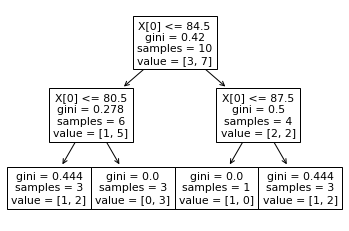

In [9]:
plot_tree(tree)
plt.show()

## Titanic Example

In [2]:
import acquire
import prepare

train, validate, test = prepare.prep_titanic_data(acquire.get_titanic_data())
train.head()

/Users/christophermayorga/Desktop/codeup-data-science/classification-exercises/prepare.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['embark_town']] = imputer.transform(test[['embark_town']])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,0,0,9.8375,1,0,0,1
370,1,1,1,0,55.4417,0,1,0,0
573,1,3,0,0,7.7500,1,0,1,0
110,0,1,0,0,52.0000,1,1,0,1
167,0,3,1,4,27.9000,0,0,0,1


In [13]:
X_cols = ['pclass', 'alone', 'embark_town_Queenstown', 'embark_town_Southampton']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [18]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 75.10%
validate score: 61.21%


In [ ]:
# TODO: interpret + visualize model

In [15]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

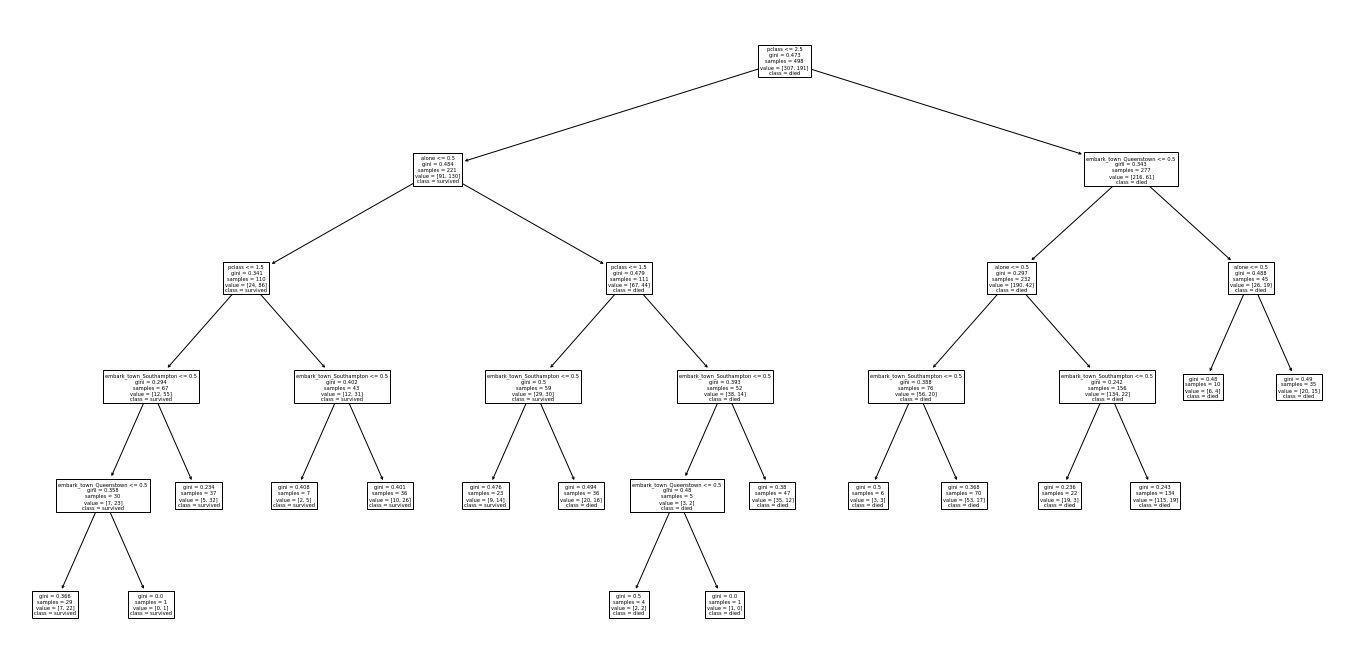

In [21]:
plt.figure(figsize=(24, 12))
plot_tree(
    model1,
    feature_names=X_train.columns.tolist(),
    class_names=['died', 'survived'],
)

plt.show()

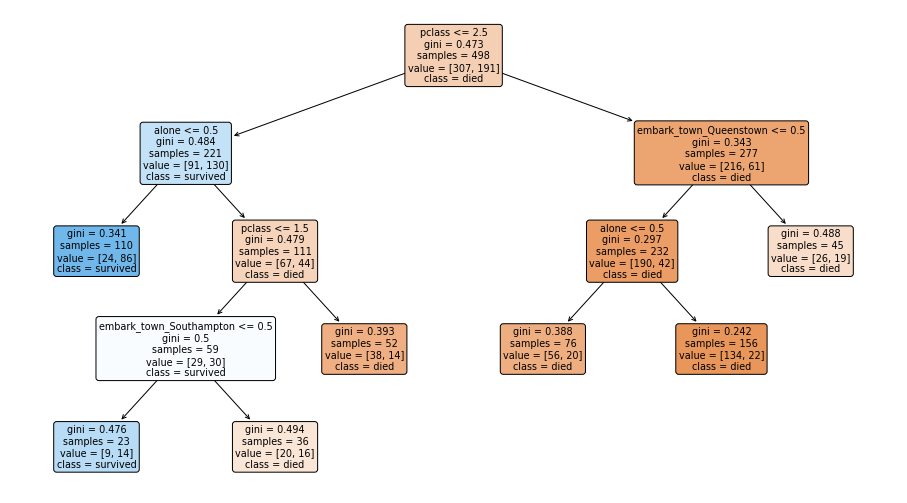

In [23]:
# TODO: create additional models
model2 = DecisionTreeClassifier(max_leaf_nodes=7)
model2.fit(X_train, y_train)

plt.figure(figsize=(16, 9))
plot_tree(model2, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'], filled=True, rounded=True)

plt.show()

In [24]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_)))

pclass                     0.612360
alone                      0.301279
embark_town_Queenstown     0.073643
embark_town_Southampton    0.012717
dtype: float64

<AxesSubplot:ylabel='Feature Importance'>

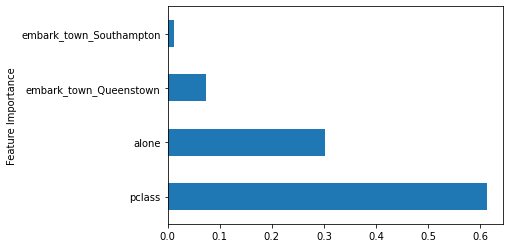

In [25]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_))).plot.barh(xlabel='Feature Importance')